In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from scipy.io.arff import loadarff 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [86]:
def discrete_bar_plot(x, main_title, x_labels=None):
    labels,counts = np.unique(x, return_counts=True)
    plt.figure(figsize=(4,2))
    plt.bar(labels, counts, align='center')
    plt.title(main_title)
    plt.xticks(labels=x_labels, rotation=45)

In [87]:
raw_data = loadarff('/Users/eneuagbale/Documents/MACHINE LEARNING/ML Assessment/DryBeanDataset/Dry_Bean_Dataset.arff')
raw_data

(array([(28395., 610.291, 208.17811671, 173.88874704, 1.19719142, 0.54981219, 28715., 190.14109727, 0.76392252, 0.988856  , 0.95802713, 0.91335775, 0.00733151, 0.00314729, 0.83422239, 0.99872389, b'SEKER'),
        (28734., 638.018, 200.52479566, 182.73441935, 1.09735646, 0.41178525, 29172., 191.27275049, 0.78396813, 0.9849856 , 0.88703364, 0.95386084, 0.00697866, 0.00356362, 0.90985051, 0.99843033, b'SEKER'),
        (29380., 624.11 , 212.82612986, 175.93114261, 1.20971266, 0.56272732, 29690., 193.4109041 , 0.77811325, 0.98955877, 0.94784947, 0.90877424, 0.00724391, 0.00304773, 0.82587062, 0.99906614, b'SEKER'),
        ...,
        (42139., 759.321, 281.53992791, 191.1879789 , 1.47258175, 0.73406478, 42569., 231.63126122, 0.72993244, 0.98989875, 0.91842409, 0.8227297 , 0.00668122, 0.00188827, 0.67688416, 0.99676726, b'DERMASON'),
        (42147., 763.779, 283.38263638, 190.27573077, 1.48932623, 0.74105479, 42667., 231.65324753, 0.70538912, 0.9878126 , 0.90790646, 0.81745745, 0.006723

In [76]:
df_data = pd.DataFrame(raw_data[0])
df_data['Class']=df_data['Class'].map(lambda x:x.decode("utf-8"))

In [77]:
df_data

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395.0,610.291,208.178117,173.888747,1.197191,0.549812,28715.0,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734.0,638.018,200.524796,182.734419,1.097356,0.411785,29172.0,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380.0,624.110,212.826130,175.931143,1.209713,0.562727,29690.0,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008.0,645.884,210.557999,182.516516,1.153638,0.498616,30724.0,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140.0,620.134,201.847882,190.279279,1.060798,0.333680,30417.0,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097.0,759.696,288.721612,185.944705,1.552728,0.765002,42508.0,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101.0,757.499,281.576392,190.713136,1.476439,0.735702,42494.0,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139.0,759.321,281.539928,191.187979,1.472582,0.734065,42569.0,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147.0,763.779,283.382636,190.275731,1.489326,0.741055,42667.0,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [68]:
df_data.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


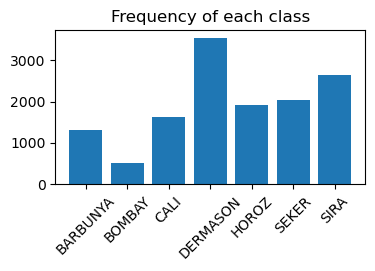

In [78]:
discrete_bar_plot(df_data['Class'],"Frequency of each class")

Text(0, 0.5, 'Perimeter')

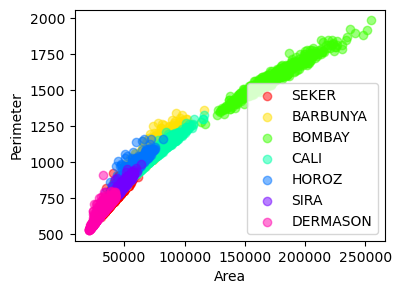

In [89]:
cmap=cm.get_cmap('hsv') 
clist=[colors.rgb2hex(cmap(k)) for k in np.linspace(0, 0.9, len(df_data['Class'].unique()))]
plt.figure(figsize=(4,3))
for j, g in enumerate(list(df_data['Class'].unique())):
    d=df_data[df_data['Class']==g]
    plt.scatter(d['Area'],d['Perimeter'],c=clist[j],label=g,alpha=0.5)#,c=[0,1,2,3,4,5,6])
plt.legend()
plt.xlabel("Area")
plt.ylabel("Perimeter")


In [79]:
np_data=np.array(df_data)

In [81]:
#split thr data into features and labels
feats = np_data[:, np.arange(0,np_data.shape[1]-1)]
labels = np_data[:, np_data.shape[1]-1]

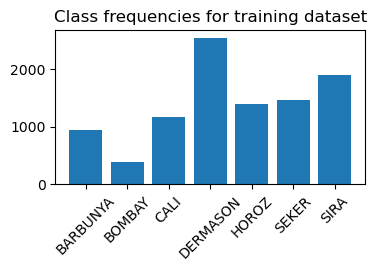

In [82]:
# Split the data 80:20 training/testing then the training 90:10 into training and validation
unscaled_train_feats, unscaled_test_feats, train_labels, test_labels = train_test_split(feats,labels, test_size=0.2, 
                                 random_state=1, shuffle=True)
unscaled_train_feats, unscaled_val_feats, train_labels, val_labels = train_test_split(unscaled_train_feats, train_labels, test_size=0.1, 
                                 random_state=1, shuffle=True)
discrete_bar_plot(train_labels, 'Class frequencies for training dataset')

In [57]:
# Scale features to mean=0 and sd=1
def scale_feats(feats):
    scaler.fit(feats)
    return scaler.transform(feats)
train_feats=scale_feats(unscaled_train_feats)
val_feats=scale_feats(unscaled_val_feats)
test_feats=scale_feats(unscaled_test_feats)

In [58]:
def acc_score(labels, preds):
    correct=0
    for i,label in enumerate(labels):
        if label==preds[i]: correct+=1
    return correct/len(labels)
def acc_per_class(labels, preds):
    correct={}
    for i,label in enumerate(labels):
        if label==preds[i]: correct[label]=correct.get(label,0)+1
    for label in correct.keys():
        correct[label]=correct[label]/list(labels).count(label)
    return correct

In [59]:
# Build and get accuracy of Logistic Regression model
def LR_build_eval(train_ids, train_labels,test_ids,test_labels, penalty='none', max_iter=10000):
    model = LogisticRegression(penalty=penalty, max_iter=max_iter).fit(train_ids, train_labels)
    preds = model.predict(test_ids)
    return acc_score(test_labels, preds), acc_per_class(test_labels, preds)
acc, acc_per_c = LR_build_eval(train_feats, train_labels,test_feats,test_labels)
print(f"Overall accuracy: {acc}; \nAccuracy per class: {dict(sorted(acc_per_c.items()))}")

Overall accuracy: 0.8982739625413148; 
Accuracy per class: {'BARBUNYA': 0.9037037037037037, 'BOMBAY': 1.0, 'CALI': 0.960960960960961, 'DERMASON': 0.7546099290780142, 'HOROZ': 0.9455958549222798, 'SEKER': 0.945679012345679, 'SIRA': 0.9577735124760077}


/Users/eneuagbale/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
